In [4]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

C:\Users\overs\Python\Master-Thesis-Project


In [9]:
import numpy as np
import copy
from datetime import datetime

import src.utils as utils
from src.nqs import RBM, RandomHamiltonian

import matplotlib.pyplot as plt
%matplotlib notebook


In [32]:

seed = 42  # Seed for random number generator
gradient_steps = 100
walker_steps = 100 # Using exact distribution to calculate energies
learning_rate = 0.01


In [33]:


finite_time_list = []
analytic_time_list =[]
parameter_size = []
for i in range(2,10):
    visible_size = i
    hidden_size = 2*i
    
    np.random.seed(seed)
    hamiltonian = RandomHamiltonian(n=visible_size)
    
    rbm_analytic = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=hamiltonian, walker_steps=walker_steps)
    rbm_finite = copy.deepcopy(rbm_analytic)
    
    energy_list_finite = rbm_finite.train(iterations=gradient_steps, lr=0.01, analytical_grad=False, print_energy=False)
    time_finite = rbm_finite.train.run_time
    
    energy_list_analytical = rbm_analytic.train(iterations=gradient_steps, lr=0.01, analytical_grad=True, print_energy=False)
    time_analytic = rbm_analytic.train.run_time
    
    finite_time_list.append(time_finite)
    analytic_time_list.append(time_analytic)
    
    parameter_size.append(visible_size*hidden_size)
    
print(f"finite time: {finite_time_list}")
print(f"analytic time: {analytic_time_list}")

func:train args:[(<src.nqs.RBM object at 0x0000028FAF551A00>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': False, 'print_energy': False}] took: 53.18150067329407 sec
func:train args:[(<src.nqs.RBM object at 0x0000028FB37D5CA0>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': True, 'print_energy': False}] took: 1.9558579921722412 sec
func:train args:[(<src.nqs.RBM object at 0x0000028FB37D5B80>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': False, 'print_energy': False}] took: 103.80369162559509 sec
func:train args:[(<src.nqs.RBM object at 0x0000028FAFDED8B0>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': True, 'print_energy': False}] took: 1.9762094020843506 sec
func:train args:[(<src.nqs.RBM object at 0x0000028FAFC48880>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': False, 'print_energy': False}] took: 175.7288875579834 sec
func:train args:[(<src.nqs.RBM object at 0x0000028FB2EFC9D0>,), {'iterations': 100, 'lr': 0.01, 'analytical_grad': True, 'print_e

<IPython.core.display.Javascript object>


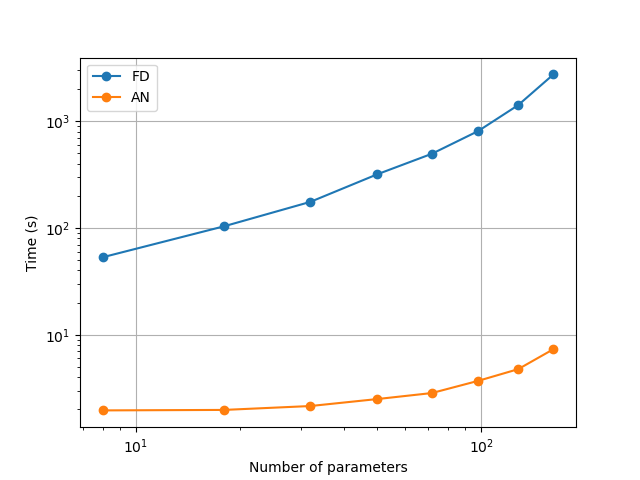

In [37]:
plt.figure(0)

#plt.plot(energy_list_analytical)

plt.loglog(parameter_size, finite_time_list, '-', marker='o')
plt.loglog(parameter_size, analytic_time_list, marker='o') 

#plt.title("Analytic/Finite difference gradient comparison")
legend = []
legend.append('FD')
legend.append('AN')
plt.legend(legend)
plt.xlabel('Number of parameters')
plt.ylabel('Time (s)')
plt.grid()

In [38]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/Timing - Analytic vs FD gradient loglog.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")